In [42]:
import numpy as np
import pandas as pd
import Red2 
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
path =      "C:\\Users\\dorla\\Desktop\\Python\\RRNN\\data\\digit_train.csv"
test_path = "C:\\Users\\dorla\\Desktop\\Python\\RRNN\\data\\digit_test.csv"
data = pd.read_csv(path)
test_data = pd.read_csv(test_path)

columnas = data.keys().values

label_del_digito = columnas[0]
label_de_pixeles = columnas[1:]

n_datos = 28000

entrada = data.get(label_de_pixeles).values[:n_datos]
valor_int_del_digito = data.get(label_del_digito).values[:n_datos].reshape(n_datos,1)

In [44]:
valores_de_salida = []
for fila in valor_int_del_digito:
    valor = fila[0]
    match valor:
        case 0:
            valores_de_salida.append( [1,0,0,0,0,0,0,0,0,0] )
        case 1:
            valores_de_salida.append( [0,1,0,0,0,0,0,0,0,0] )
        case 2:
            valores_de_salida.append( [0,0,1,0,0,0,0,0,0,0] )
        case 3:
            valores_de_salida.append( [0,0,0,1,0,0,0,0,0,0] )
        case 4:
            valores_de_salida.append( [0,0,0,0,1,0,0,0,0,0] )
        case 5:
            valores_de_salida.append( [0,0,0,0,0,1,0,0,0,0] )
        case 6:
            valores_de_salida.append( [0,0,0,0,0,0,1,0,0,0] )
        case 7:
            valores_de_salida.append( [0,0,0,0,0,0,0,1,0,0] )
        case 8:
            valores_de_salida.append( [0,0,0,0,0,0,0,0,1,0] )
        case 9:
            valores_de_salida.append( [0,0,0,0,0,0,0,0,0,1] )

valores_de_salida = np.array(valores_de_salida)

In [61]:
iteraciones = int( 1e2 )
paso =1.
tolerancia = 1e-11

red = Red2.Red([784,10,10,10,10])

red.Entrenar(entrada ,valores_de_salida, iteraciones, paso, tolerancia ,N_batch=100, print_cada=1)

Iteraciones:  0 .  Error promedio :  0.09316301225971446
Iteraciones:  1 .  Error promedio :  0.09315199518671534
Iteraciones:  2 .  Error promedio :  0.0930759051092817
Iteraciones:  3 .  Error promedio :  0.0914869201741423
Iteraciones:  4 .  Error promedio :  0.08858686904477561
Iteraciones:  5 .  Error promedio :  0.08569083308896332
Iteraciones:  6 .  Error promedio :  0.08377173232975621
Iteraciones:  7 .  Error promedio :  0.0824069514296941
Iteraciones:  8 .  Error promedio :  0.08061392241003336
Iteraciones:  9 .  Error promedio :  0.07680280856256103
Iteraciones:  10 .  Error promedio :  0.06886279162716231
Iteraciones:  11 .  Error promedio :  0.055286464799236074
Iteraciones:  12 .  Error promedio :  0.04302579420736927
Iteraciones:  13 .  Error promedio :  0.03736299655650652
Iteraciones:  14 .  Error promedio :  0.03560445155717396
Iteraciones:  15 .  Error promedio :  0.034768043559320484
Iteraciones:  16 .  Error promedio :  0.0339738526402484
Iteraciones:  17 .  Error 

In [62]:

iteraciones = 500
red.Entrenar(entrada ,valores_de_salida, iteraciones, paso, tolerancia ,N_batch=100, print_cada=1)



test = test_data.get(label_de_pixeles).values

Iteraciones:  0 .  Error promedio :  0.004237296275463775
Iteraciones:  1 .  Error promedio :  0.004248445486418477
Iteraciones:  2 .  Error promedio :  0.0042610041083612545
Iteraciones:  3 .  Error promedio :  0.00427611650355765
Iteraciones:  4 .  Error promedio :  0.004288599592903516
Iteraciones:  5 .  Error promedio :  0.004296171121248606
Iteraciones:  6 .  Error promedio :  0.0042993753520050165
Iteraciones:  7 .  Error promedio :  0.004299074955208491
Iteraciones:  8 .  Error promedio :  0.0042953995805839135
Iteraciones:  9 .  Error promedio :  0.004288394535817851
Iteraciones:  10 .  Error promedio :  0.004278534190078554
Iteraciones:  11 .  Error promedio :  0.00426656911881012
Iteraciones:  12 .  Error promedio :  0.004253259976282099
Iteraciones:  13 .  Error promedio :  0.004239210492564796
Iteraciones:  14 .  Error promedio :  0.0042247106668472445
Iteraciones:  15 .  Error promedio :  0.004209649527600542
Iteraciones:  16 .  Error promedio :  0.004193648226153639
Itera

c:\Users\dorla\Desktop\Python\RRNN\Red2.py:140: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-x))


[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
El digito correspondiente es:  7


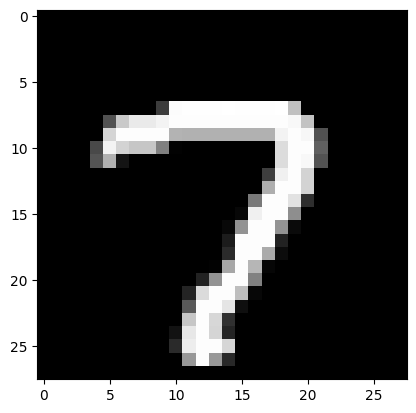

In [63]:
## Prueba individual para var que tan bien le va a ala red.
## Para elegir el digito, al final se elige el con seguridad mayor
n1 = np.random.randint(0,2800)
prueba1 = test[n1].reshape(1,784)
fig, ax = plt.subplots(1,1)
res = red.EvaluarBatch(prueba1)
res_round = np.round(res.T)
posibilidades = []
i=0
print(res_round)
for var in res_round[0]:
    if var != 0:
        posibilidades.append(i)
    
    i+=1
prueba1 = prueba1.reshape(28,28)
plt.imshow(prueba1, cmap='gray')
max_prob=0
max = -1
for j in posibilidades:
    if res[j] > max_prob:
        max_prob = res[j]
        max = j
print("El digito correspondiente es: ", max)

In [ ]:
## Esta parte la hice para guardar la red entrenada  ##

# data_W = []
# data_B = []

# for i, capa in enumerate(red.W):
#     data_W.append({
#         'capa': i,
#         'pesos': capa
#     })

# for i, capa in enumerate(red.B):
#     data_B.append( {
#         'capa': i,
#         'pesos': capa
#     } )

# dfw = pd.DataFrame(data_W)
# dfb = pd.DataFrame(data_B)

# dfw.to_pickle('pesos.pkl')
# dfb.to_pickle('biases.pkl')
